In [1]:
import os
import glob
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt

In [2]:
os.chdir("/mnt/lareaulab/reliscu/projects/Chronocell/data/protein_degradation_rates")

In [3]:
file_list = glob.glob("*standardized.csv")
subset_columns = ['Gene', 'Half-life']

df_list = []
for file in [file for file in file_list if "Human" in file]:
    df = pd.read_csv(file)
    study = df['Study'].iloc[0]
    cell_type = df['Cell_type'].iloc[0]
    df = df[subset_columns]
    df = df.rename(columns={"Half-life": f"Half-life_{study}_{cell_type}", 
                            "Cell_type": f"Cell_type_{study}"}) 
    df_list.append(df)

In [4]:
df_list[0].head()

,Gene,Half-life_Boisvert2011_HeLa cells
0,EXOC4,999.000000
1,FAM82A2,999.000000
2,NDUFAF4,314.628167
3,XPOT,999.000000
4,ACOT2,83.151493


In [5]:

# Recursively outer join all DataFrames in df_list on 'Gene'
merged_df = reduce(lambda left, right: pd.merge(left, right, on="Gene", how="outer"), df_list)

In [6]:
merged_df.head()

,Gene,Half-life_Boisvert2011_HeLa cells,Half-life_Mathieson2018_B cells,Half-life_Matsuda2024_Induced presomitic mesoderm cells,Half-life_Cambridge2011_HeLa cells,Half-life_Li2021_RPE-1 retinal pigmented epithelial cells,Half-life_Mathieson2018_NK cells,Half-life_Mathieson2018_Monocytes,Half-life_Li2021_HEK293T kidney cells,Half-life_Li2021_HCT116 colon cancer-derived epithelial cells,Half-life_McShane2016_RPE-1 retinal pigmented epithelial cells,Half-life_Zecha2018_HeLa cells,Half-life_Li2021_U2OS tibia cells,Half-life_Mathieson2018_Hepatocytes
0,EXOC4,999.000000,67.0455,25.937362,34.7,NaN,125.4715,76.2035,NaN,NaN,112.600000,60.613506,NaN,79.126
1,FAM82A2,999.000000,NaN,NaN,44.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NDUFAF4,314.628167,74.3840,31.289945,NaN,NaN,NaN,75.8530,NaN,NaN,17.132856,44.805894,NaN,71.389
3,XPOT,999.000000,66.3855,72.314075,45.5,NaN,297.3960,89.0355,NaN,NaN,300.000000,80.642572,NaN,NaN
4,ACOT2,83.151493,NaN,126.785001,43.5,NaN,NaN,NaN,NaN,NaN,35.318764,48.951072,NaN,177.948


In [7]:
# Remove genes with only 1 measurment
half_life_cols = [col for col in merged_df.columns if "Half-life" in col]
filtered_df = merged_df[merged_df[half_life_cols].notna().sum(axis=1) >= 2]


In [15]:
half_life_cols = [col for col in merged_df.columns if "Half-life" in col]
filtered_df = merged_df[merged_df[half_life_cols].notna().sum(axis=1) >= 10]


In [16]:
filtered_df.shape

(212, 14)

In [ ]:
merged_long_df = filtered_df.melt(id_vars='Gene', value_vars=half_life_cols, var_name='Study', value_name='Half-life')


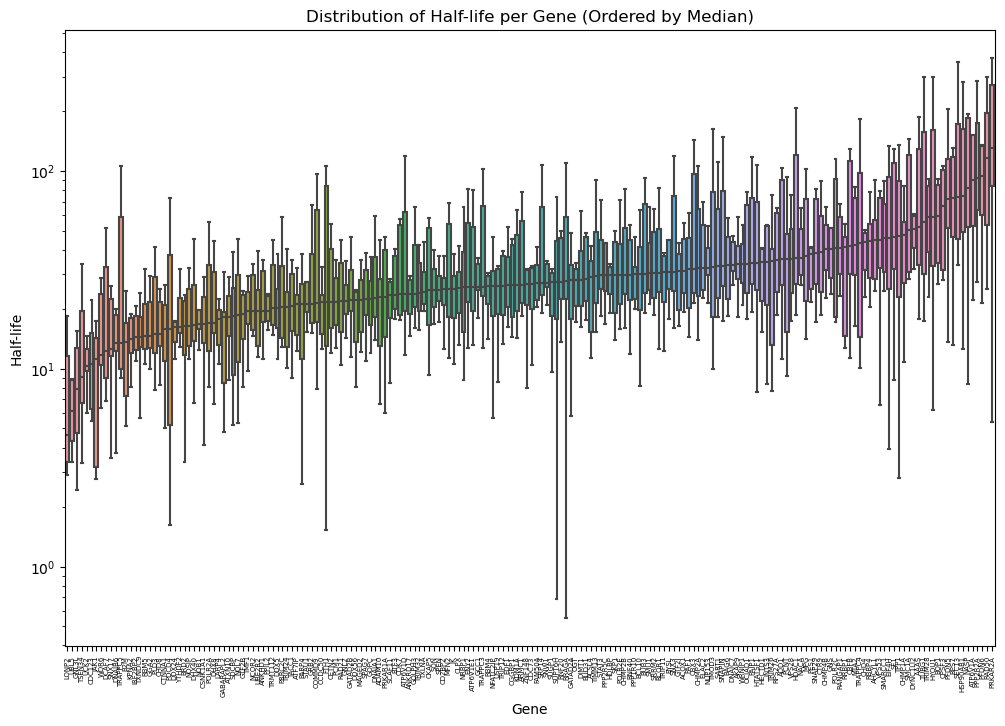

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

medians = merged_long_df.groupby('Gene')['Half-life'].median().sort_values()

plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_long_df, x='Gene', y='Half-life', order=medians.index, showfliers=False)
plt.xticks(rotation=90, fontsize=5)
plt.yscale('log')
plt.title("Distribution of Half-life per Gene (Ordered by Median)")
plt.show()